# Forbes Global 2000 (2021)

Source: https://www.forbes.com/lists/global2000/#635502995ac0

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Forbes Global 2000 - 2021.xlsx')
df = pd.read_excel(filepath)

# Head and Tail

In [4]:
df

,Rank,Name,Country,Sales,Profit,Assets,Market Value
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B"
...,...,...,...,...,...,...,...
1995,1996,JTEKT,Japan,$13.1 B,$-34.9 M,$12 B,$3.5 B
1996,1997,Insurance Australia Group,Australia,$5.4 B,$-212 M,$25 B,$9.3 B
1997,1997,Sumec Corporation,China,$13 B,$79.2 M,$7.1 B,$1.3 B
1998,1999,Gold Fields,South Africa,$3.9 B,$718.1 M,$7.5 B,$8.9 B


In [5]:
df.shape

(2000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          2000 non-null   int64 
 1   Name          2000 non-null   object
 2   Country       2000 non-null   object
 3   Sales         2000 non-null   object
 4   Profit        2000 non-null   object
 5   Assets        1999 non-null   object
 6   Market Value  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [7]:
df.rename(
    columns={
        'Name': 'CompanyName',
        'Market Value': 'MarketValue'
    },
    inplace=True
)

In [8]:
df.head()

,Rank,CompanyName,Country,Sales,Profit,Assets,MarketValue
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B"


# Explore Top 100 Companies in 2021

In [9]:
df_top100 = df[:100]
df_top100

,Rank,CompanyName,Country,Sales,Profit,Assets,MarketValue
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B"
...,...,...,...,...,...,...,...
95,96,China Vanke,China,$62.6 B,$6.1 B,$285.8 B,$42.2 B
96,97,GlaxoSmithKline,United Kingdom,$43.7 B,$7.4 B,$109.9 B,$92.9 B
97,98,Truist Financial,United States,$24.3 B,$4.9 B,$517.5 B,$77.8 B
98,99,Rosneft,Russia,$70.8 B,$2 B,$207.5 B,$77.7 B


In [10]:
df_top100.shape

(100, 7)

# Data Cleaning

strip dolar and billion signs from sales, profit, assets and market value columns

In [11]:
df_top100[['Sales', 'Profit', 'Assets', 'MarketValue']] = df_top100[['Sales', 'Profit', 'Assets', 'MarketValue']].applymap(lambda x: str.lstrip(x, '$'))
df_top100[['Sales', 'Profit', 'Assets', 'MarketValue']] = df_top100[['Sales', 'Profit', 'Assets', 'MarketValue']].applymap(lambda x: str.rstrip(x, 'B'))
df_top100

,Rank,CompanyName,Country,Sales,Profit,Assets,MarketValue
0,1,ICBC,China,190.5,45.8,"4,914.7",249.5
1,2,JPMorgan Chase,United States,136.2,40.4,"3,689.3",464.8
2,3,Berkshire Hathaway,United States,245.5,42.5,873.7,624.4
3,4,China Construction Bank,China,173.5,39.3,"4,301.7",210.4
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7,49.3,510.3,"1,897.2"
...,...,...,...,...,...,...,...
95,96,China Vanke,China,62.6,6.1,285.8,42.2
96,97,GlaxoSmithKline,United Kingdom,43.7,7.4,109.9,92.9
97,98,Truist Financial,United States,24.3,4.9,517.5,77.8
98,99,Rosneft,Russia,70.8,2,207.5,77.7


strip sales, profit, assets and market value columns of all commas

In [12]:
df_top100[['Sales', 'Profit', 'Assets', 'MarketValue']] = df_top100[['Sales', 'Profit', 'Assets', 'MarketValue']].replace(',', '', regex=True)
df_top100

,Rank,CompanyName,Country,Sales,Profit,Assets,MarketValue
0,1,ICBC,China,190.5,45.8,4914.7,249.5
1,2,JPMorgan Chase,United States,136.2,40.4,3689.3,464.8
2,3,Berkshire Hathaway,United States,245.5,42.5,873.7,624.4
3,4,China Construction Bank,China,173.5,39.3,4301.7,210.4
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7,49.3,510.3,1897.2
...,...,...,...,...,...,...,...
95,96,China Vanke,China,62.6,6.1,285.8,42.2
96,97,GlaxoSmithKline,United Kingdom,43.7,7.4,109.9,92.9
97,98,Truist Financial,United States,24.3,4.9,517.5,77.8
98,99,Rosneft,Russia,70.8,2,207.5,77.7


# Change Data Types

change sales, profit, assets and market value columns to numpy float

In [13]:
df_top100[['Sales', 'Profit', 'Assets', 'MarketValue']] = df_top100[['Sales', 'Profit', 'Assets', 'MarketValue']].astype(np.float64)
df_top100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         100 non-null    int64  
 1   CompanyName  100 non-null    object 
 2   Country      100 non-null    object 
 3   Sales        100 non-null    float64
 4   Profit       100 non-null    float64
 5   Assets       100 non-null    float64
 6   MarketValue  100 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.6+ KB


In [14]:
df_top100['Rank'] = df_top100['Rank'].astype('category')
df_top100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Rank         100 non-null    category
 1   CompanyName  100 non-null    object  
 2   Country      100 non-null    object  
 3   Sales        100 non-null    float64 
 4   Profit       100 non-null    float64 
 5   Assets       100 non-null    float64 
 6   MarketValue  100 non-null    float64 
dtypes: category(1), float64(4), object(2)
memory usage: 7.7+ KB


In [15]:
df_top100[['Sales', 'Profit', 'Assets', 'MarketValue']].describe()

,Sales,Profit,Assets,MarketValue
count,100.000000,100.00000,100.000000,100.000000
mean,108.273000,12.81400,813.410000,266.264000
std,85.977492,11.95941,1077.079768,406.015313
min,22.400000,2.00000,70.600000,33.000000
25%,50.325000,5.35000,155.550000,84.100000
50%,75.950000,8.40000,318.050000,131.150000
75%,130.450000,14.95000,1134.050000,231.100000
max,559.200000,63.90000,4914.700000,2252.300000


# Exploratory Data Analysis

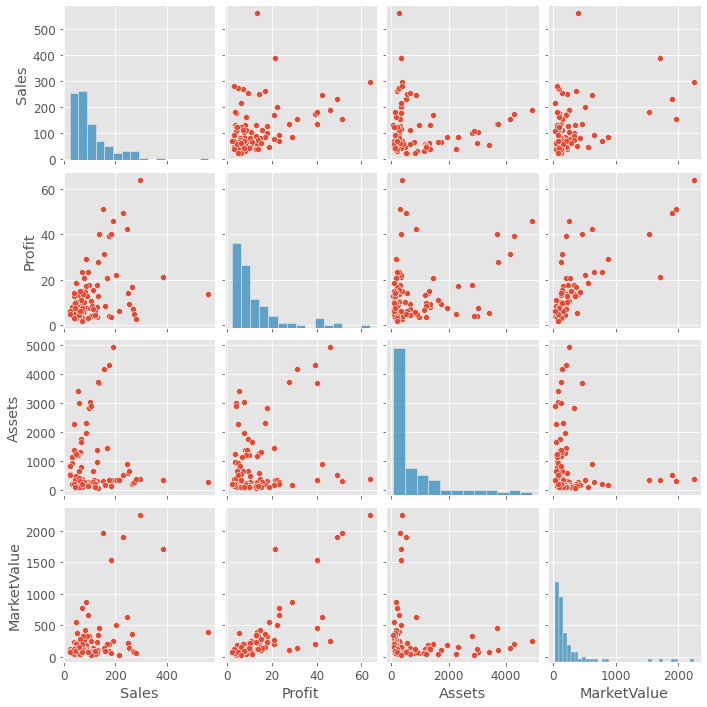

In [16]:
sns.pairplot(df_top100[['Sales', 'Profit', 'Assets', 'MarketValue']])

# Missing Values Exploration

In [17]:
df_top100.isna().sum()

Rank           0
CompanyName    0
Country        0
Sales          0
Profit         0
Assets         0
MarketValue    0
dtype: int64

# Grouping and Aggregation

In [18]:
df_top100_grpd_agg = df_top100.groupby('Country').agg(np.sum)
df_top100_grpd_agg

,Sales,Profit,Assets,MarketValue
Country,,,,
Australia,68.5,12.6,919.4,306.8
Canada,169.6,27.4,4233.0,372.8
China,2229.6,291.6,27995.2,3108.0
France,324.2,30.4,4269.4,654.6
Germany,845.8,35.3,3129.5,655.6
Hong Kong,153.9,21.4,585.8,288.6
India,61.2,5.7,166.3,164.9
Italy,117.2,6.7,1426.7,158.7
Japan,832.9,65.8,10154.0,822.5


# Data Visualization

In [19]:
from matplotlib.ticker import FuncFormatter

def trillion(x, pos):
    'The two args are the value and tick position'
    return '%1.1fTn' % (x * 1e-3)

format_trill = FuncFormatter(trillion)

def billion(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x * 1)

format_bill = FuncFormatter(billion)

# bar plot helper function
def plot_bar(y, width, color=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # Initialize the matplotlib figure
    fig, ax = plt.subplots()

    # plot bar chart
    ax.barh(y=y, width=width, color=color)

    # Add informative axis label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # set x-axis major formatter
    ax.xaxis.set_major_formatter(formatter=formatter)

    # labels read top-to-bottom
    ax.invert_yaxis()  

    return plot_bar

# Sales Exploration By Country

In [20]:
df_top100_grpd_agg_desc_sales = df_top100_grpd_agg['Sales'].sort_values(ascending=False)
df_top100_grpd_agg_desc_sales

Country
United States     4748.0
China             2229.6
Germany            845.8
Japan              832.9
France             324.2
Switzerland        291.2
Taiwan             230.1
Saudi Arabia       229.7
South Korea        200.7
Canada             169.6
United Kingdom     162.1
Hong Kong          153.9
Russia             118.1
Italy              117.2
Australia           68.5
India               61.2
Luxembourg          44.5
Name: Sales, dtype: float64

<function __main__.plot_bar(y, width, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

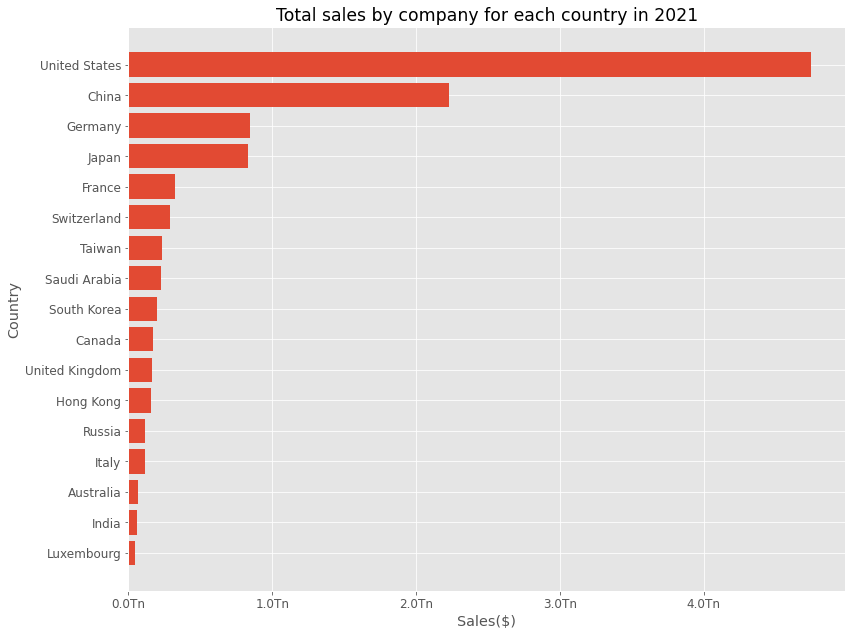

In [21]:
plot_bar(
    y=df_top100_grpd_agg_desc_sales.keys(), width=df_top100_grpd_agg_desc_sales.values,
    xlabel='Sales($)', ylabel='Country', title='Total sales by company for each country in 2021',
    formatter=format_trill
)

# Profit Exploration By Country

In [22]:
df_top100_grpd_agg_desc_profit = df_top100_grpd_agg['Profit'].sort_values(ascending=False)
df_top100_grpd_agg_desc_profit

Country
United States     604.5
China             291.6
Japan              65.8
Saudi Arabia       49.3
Switzerland        46.6
Germany            35.3
France             30.4
Canada             27.4
Taiwan             22.2
South Korea        22.1
Hong Kong          21.4
United Kingdom     17.7
Australia          12.6
Russia             12.4
Luxembourg          9.7
Italy               6.7
India               5.7
Name: Profit, dtype: float64

<function __main__.plot_bar(y, width, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

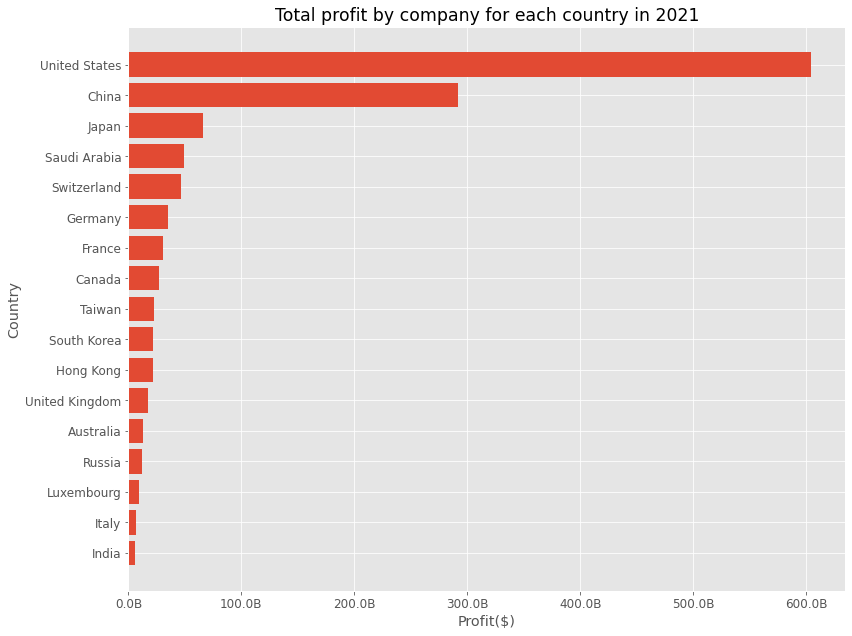

In [23]:
plot_bar(
    y=df_top100_grpd_agg_desc_profit.keys(), width=df_top100_grpd_agg_desc_profit.values,
    xlabel='Profit($)', ylabel='Country', title='Total profit by company for each country in 2021',
    formatter=format_bill
)

# Assets Exploration By Country

In [24]:
df_top100_grpd_agg_desc_assets = df_top100_grpd_agg['Assets'].sort_values(ascending=False)
df_top100_grpd_agg_desc_assets

Country
China             27995.2
United States     21495.9
Japan             10154.0
France             4269.4
Canada             4233.0
United Kingdom     3176.9
Germany            3129.5
Switzerland        1909.5
Italy              1426.7
Australia           919.4
Russia              694.4
Hong Kong           585.8
Saudi Arabia        510.3
South Korea         348.2
Taiwan              229.1
India               166.3
Luxembourg           97.4
Name: Assets, dtype: float64

<function __main__.plot_bar(y, width, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

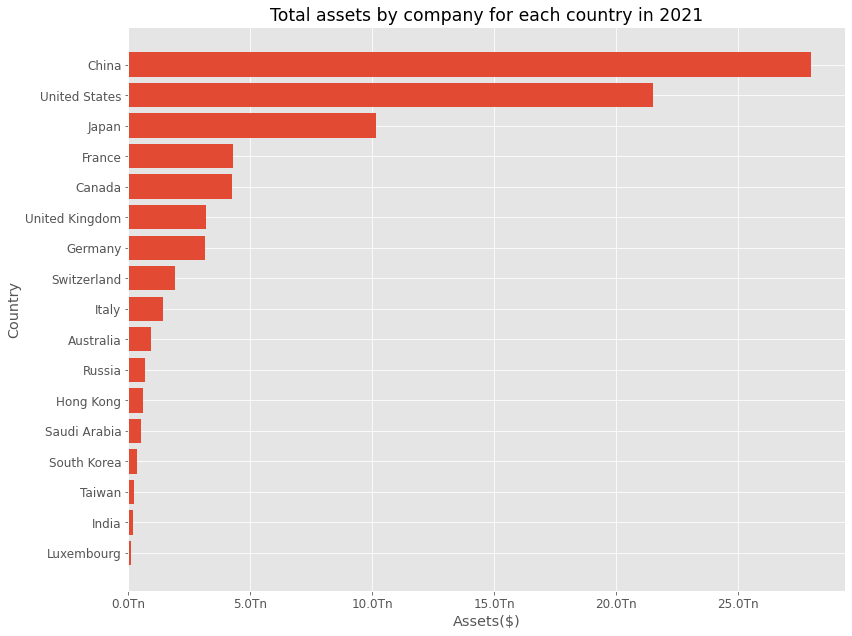

In [25]:
plot_bar(
    y=df_top100_grpd_agg_desc_assets.keys(), width=df_top100_grpd_agg_desc_assets.values,
    xlabel='Assets($)', ylabel='Country', title='Total assets by company for each country in 2021',
    formatter=format_trill
)

# Market Value Exploration By Country

In [26]:
df_top100_grpd_agg_desc_mktval = df_top100_grpd_agg['MarketValue'].sort_values(ascending=False)
df_top100_grpd_agg_desc_mktval

Country
United States     15466.8
China              3108.0
Saudi Arabia       1897.2
Switzerland         937.9
Japan               822.5
Germany             655.6
France              654.6
Taiwan              618.5
South Korea         510.5
Canada              372.8
United Kingdom      364.3
Australia           306.8
Hong Kong           288.6
India               164.9
Russia              163.4
Italy               158.7
Luxembourg          135.3
Name: MarketValue, dtype: float64

<function __main__.plot_bar(y, width, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

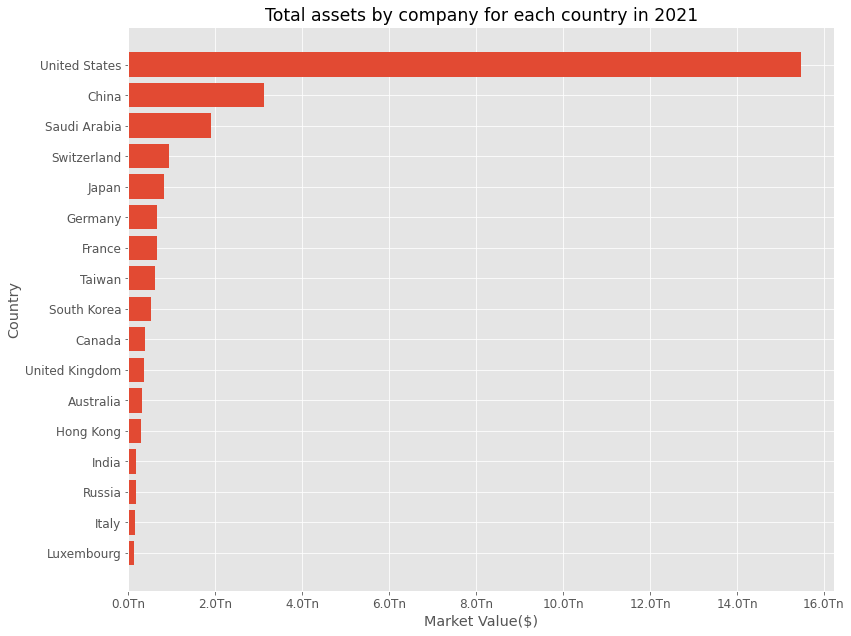

In [27]:
plot_bar(
    y=df_top100_grpd_agg_desc_mktval.keys(), width=df_top100_grpd_agg_desc_mktval.values,
    xlabel='Market Value($)', ylabel='Country', title='Total assets by company for each country in 2021',
    formatter=format_trill
)

# Company Exploration

<function __main__.plot_bar(y, width, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

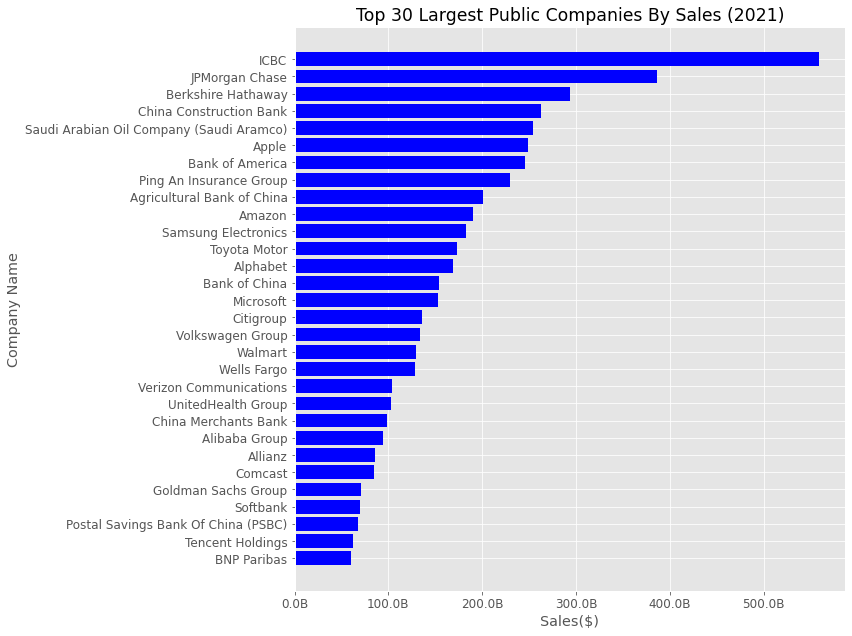

In [28]:
plot_bar(
    y=df_top100['CompanyName'][:30], width=df_top100['Sales'][:30].sort_values(ascending=False), color='blue',
    xlabel='Sales($)', ylabel='Company Name', title='Top 30 Largest Public Companies By Sales (2021)',
    formatter=format_bill 
)

<function __main__.plot_bar(y, width, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

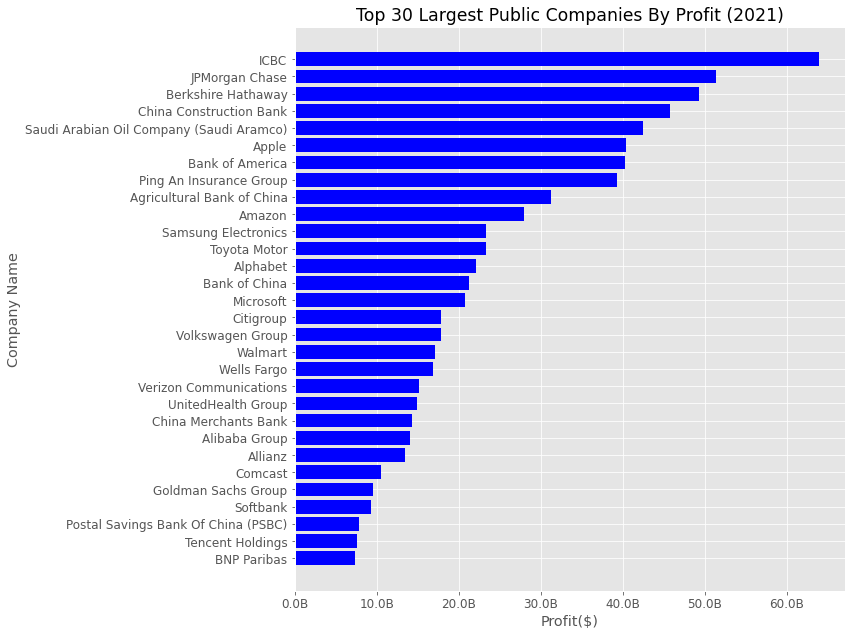

In [29]:
plot_bar(
    y=df_top100['CompanyName'][:30], width=df_top100['Profit'][:30].sort_values(ascending=False), color='blue',
    xlabel='Profit($)', ylabel='Company Name', title='Top 30 Largest Public Companies By Profit (2021)',
    formatter=format_bill 
)

<function __main__.plot_bar(y, width, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

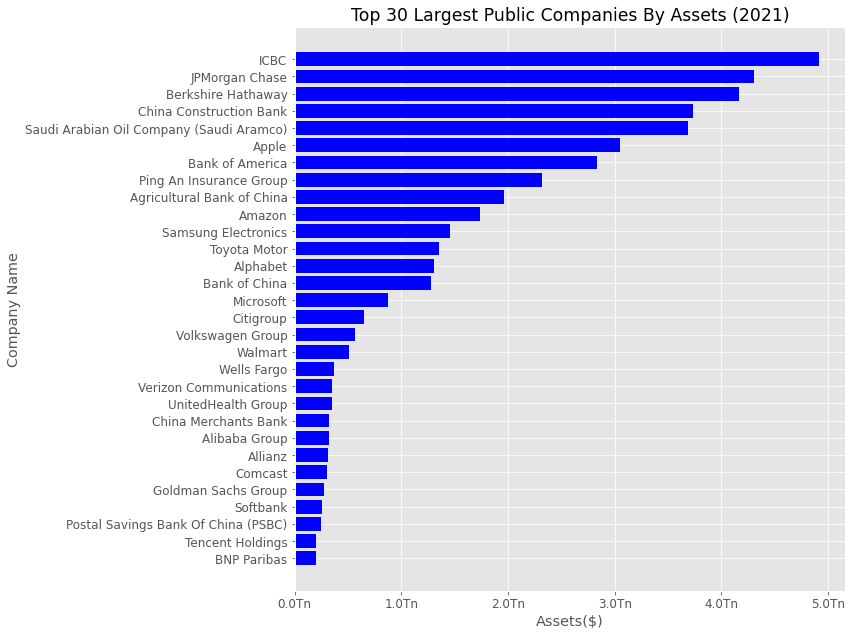

In [30]:
plot_bar(
    y=df_top100['CompanyName'][:30], width=df_top100['Assets'][:30].sort_values(ascending=False), color='blue',
    xlabel='Assets($)', ylabel='Company Name', title='Top 30 Largest Public Companies By Assets (2021)',
    formatter=format_trill
)

<function __main__.plot_bar(y, width, color=None, xlabel=None, ylabel=None, title=None, formatter=None)>

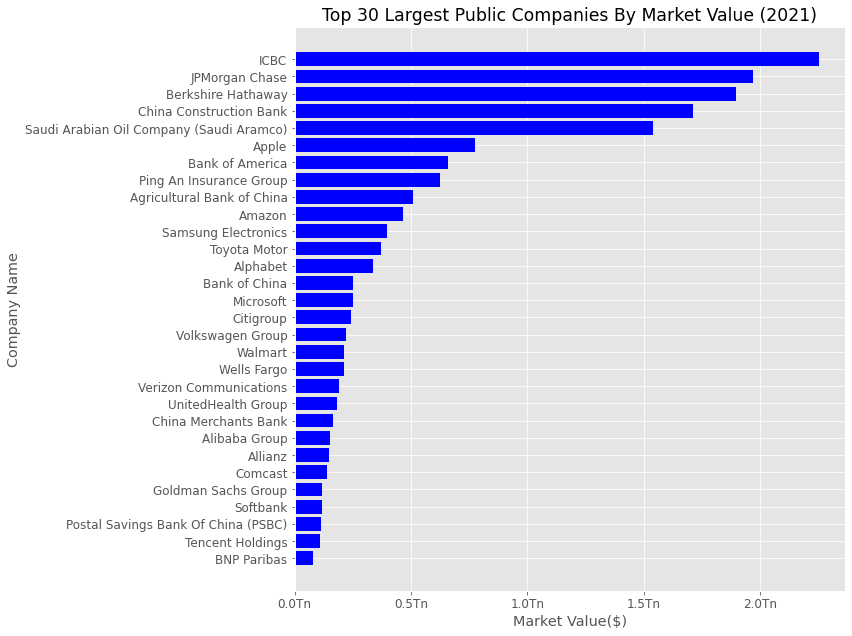

In [31]:
plot_bar(
    y=df_top100['CompanyName'][:30], width=df_top100['MarketValue'][:30].sort_values(ascending=False), color='blue',
    xlabel='Market Value($)', ylabel='Company Name', title='Top 30 Largest Public Companies By Market Value (2021)',
    formatter=format_trill
)